In [365]:
# Bibliotecas e Dataset
# Dataset : https://www.kaggle.com/datasets/budincsevity/szeged-weather/data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

In [366]:
# Carregando o dataset e mostrando alguns dados
df = pd.read_csv('Weather_History.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [367]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [368]:
# Removendo colunas não necessárias para os problemas
df = df.drop(['Formatted Date', 'Summary', 'Daily Summary'], axis=1)

In [369]:
# Visualização após a remoção das colunas
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [370]:
# Dados categóricos
print('Tipos de precipitação : ', df['Precip Type'].unique())
df['Precip Type'] = df['Precip Type'].fillna('sunny')
print('Tipos de precipitação : ', df['Precip Type'].unique())

Tipos de precipitação :  ['rain' 'snow' nan]
Tipos de precipitação :  ['rain' 'snow' 'sunny']


<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

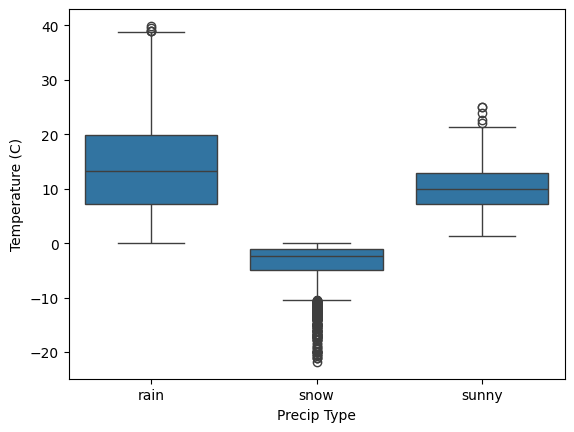

In [371]:
sns.boxplot(data=df, y='Temperature (C)', x = 'Precip Type')

In [372]:
sun_days = df[(df['Precip Type']=='sunny')]
rainy_days = df[(df['Precip Type']=='rain')]
snow_days = df[(df['Precip Type']=='snow')]

<Axes: title={'center': 'Todos'}, xlabel='Temperature (C)', ylabel='Humidity'>

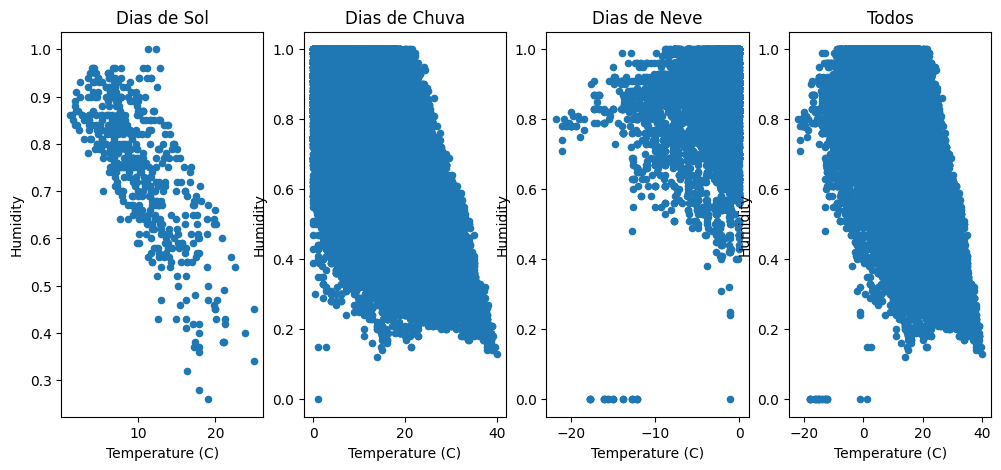

In [373]:
# Gráfico para cada um dos casos
fig, ax = plt.subplots(1,4, figsize=(12,5))
sun_days.plot(x='Temperature (C)', y='Humidity', kind='scatter', ax=ax[0], title='Dias de Sol')
rainy_days.plot(x='Temperature (C)', y='Humidity', kind='scatter', ax=ax[1], title='Dias de Chuva')
snow_days.plot(x='Temperature (C)', y='Humidity', kind='scatter', ax=ax[2], title='Dias de Neve')
df.plot(x='Temperature (C)', y='Humidity', kind='scatter', ax=ax[3], title='Todos')

In [374]:
# Dias de sol - Possui maior relação linear entre os dados.
print('**Informação do dataset** \n')
print(sun_days.info())
print('\n**Visualização de variáveis nulas**\n')
print(sun_days.isna().sum())

**Informação do dataset** 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               517 non-null    object 
 1   Temperature (C)           517 non-null    float64
 2   Apparent Temperature (C)  517 non-null    float64
 3   Humidity                  517 non-null    float64
 4   Wind Speed (km/h)         517 non-null    float64
 5   Wind Bearing (degrees)    517 non-null    float64
 6   Visibility (km)           517 non-null    float64
 7   Loud Cover                517 non-null    float64
 8   Pressure (millibars)      517 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.4+ KB
None

**Visualização de variáveis nulas**

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearin

In [375]:
# Separando colunas
input = np.array([sun_days['Apparent Temperature (C)'], sun_days['Temperature (C)'], sun_days['Pressure (millibars)'],
                 sun_days['Wind Speed (km/h)'], sun_days['Wind Bearing (degrees)']],
                 dtype="float32").T

target = np.array([sun_days['Humidity']],
                  dtype="float32").T

In [376]:
input.shape

(517, 5)

In [377]:
# Transformando em tensor
input = torch.from_numpy(input)
target = torch.from_numpy(target)

In [378]:
#declare random weight and bias
w = torch.randn(1, 5, requires_grad=True,dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)

In [379]:
# return (input*weight)+bias
def SModel(x):
    return x @ w.t() + b

In [380]:
#mean absolute error
def MAE(t1, t2):
    dif = torch.abs(t1 - t2)
    return torch.sum(dif)/dif.numel()

In [381]:
for i in range(30001):
    pred = SModel(input)
    loss = MAE(pred, target)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 0.00001
        b -= b.grad * 0.00001
        w.grad.zero_()
        b.grad.zero_()
    if (i%1000==0 or i==10000):
        print("Loss:{} at epoch:{}/30000".format(loss, i))

Loss:1188.097412109375 at epoch:0/30000
Loss:10.752947807312012 at epoch:1000/30000
Loss:10.372764587402344 at epoch:2000/30000
Loss:9.992779731750488 at epoch:3000/30000
Loss:9.612890243530273 at epoch:4000/30000
Loss:9.232986450195312 at epoch:5000/30000
Loss:8.853118896484375 at epoch:6000/30000
Loss:8.473793029785156 at epoch:7000/30000
Loss:8.095454216003418 at epoch:8000/30000
Loss:7.71718168258667 at epoch:9000/30000
Loss:7.33986759185791 at epoch:10000/30000
Loss:6.963974475860596 at epoch:11000/30000
Loss:6.58970308303833 at epoch:12000/30000
Loss:6.217280387878418 at epoch:13000/30000
Loss:5.846218585968018 at epoch:14000/30000
Loss:5.476931571960449 at epoch:15000/30000
Loss:5.110713958740234 at epoch:16000/30000
Loss:4.747927665710449 at epoch:17000/30000
Loss:4.389251232147217 at epoch:18000/30000
Loss:4.041231632232666 at epoch:19000/30000
Loss:3.6936068534851074 at epoch:20000/30000
Loss:3.3925650119781494 at epoch:21000/30000
Loss:3.513151168823242 at epoch:22000/30000


# Funções Integradas

In [382]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
tensor_train = TensorDataset(input, target)
dataloader_train = DataLoader(tensor_train, batch_size=5, shuffle=True)

In [385]:
model = nn.Linear(5, 1)
model.bias

Parameter containing:
tensor([-0.3193], requires_grad=True)

In [386]:
preds = model(input)
lossfn = nn.SmoothL1Loss()
loss = lossfn(preds, target)
op = torch.optim.SGD(model.parameters(), 0.00001)

In [387]:
def fit(epochs, model, lossfn, op, dltrain):
    for epoch in range(epochs):
        for i, j in dltrain:
            pred = model(i)
            loss = lossfn(pred, j)
            loss.backward()
            op.step()
            op.zero_grad()
        if (epoch%5==0 or epoch==epochs):
            print("Epoca[{}/{}] Erro: {}".format(epoch+1, epochs, loss))

In [388]:
fit(100, model, lossfn, op, dataloader_train)

Epoca[1/100] Erro: 4.476104259490967
Epoca[6/100] Erro: 4.497840881347656
Epoca[11/100] Erro: 4.291460037231445
Epoca[16/100] Erro: 4.470458984375
Epoca[21/100] Erro: 1.1441291570663452
Epoca[26/100] Erro: 6.996349334716797
Epoca[31/100] Erro: 5.383244514465332
Epoca[36/100] Erro: 2.9477927684783936
Epoca[41/100] Erro: 5.852293014526367
Epoca[46/100] Erro: 5.450063705444336
Epoca[51/100] Erro: 4.512673377990723
Epoca[56/100] Erro: 4.696207046508789
Epoca[61/100] Erro: 4.546205043792725
Epoca[66/100] Erro: 4.963131904602051
Epoca[71/100] Erro: 3.2390918731689453
Epoca[76/100] Erro: 8.538661003112793
Epoca[81/100] Erro: 4.426417350769043
Epoca[86/100] Erro: 6.755345344543457
Epoca[91/100] Erro: 7.210620880126953
Epoca[96/100] Erro: 6.734999179840088
